# Predicting Iris Species with a Nerual Network

In [1]:
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


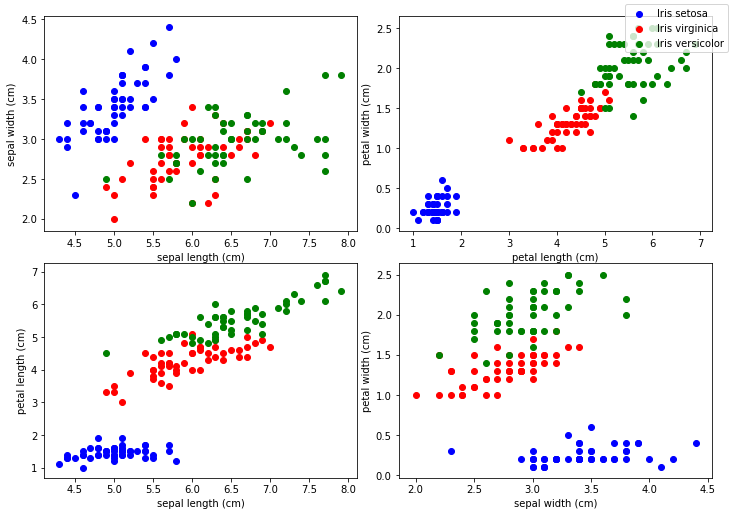

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

# features to plot against each other
plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    x_col = df.columns[plots[i][0]]
    y_col = df.columns[plots[i][1]]
    
    for j in range(3):
        # get data for each target
        target_df = df[df['target']==j]
        x_coords = target_df[x_col]
        y_coords = target_df[y_col]

        ax.scatter(x_coords, y_coords, color=colors[j])
        ax.set(xlabel=x_col, ylabel=y_col)

fig.legend(labels=labels, loc=1)
plt.show()

In [4]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [5]:
class Model(nn.Module):
    def __init__(self, n_in=4, h1=6, h2=9, n_out=3):
        super().__init__()
        self.fc1 = nn.Linear(n_in,h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, n_out)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [6]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 0 or i == epochs-1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.16384077
epoch: 25  loss: 0.65725207
epoch: 50  loss: 0.31340873
epoch: 75  loss: 0.09309052
epoch: 99  loss: 0.04631956


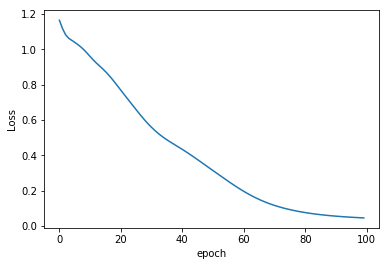

In [8]:
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [9]:
df_test = pd.DataFrame(X_test, columns=df.columns[:4])
df_test['target'] = y_test
with torch.no_grad():
    df_test['pred'] = model.forward(X_test).argmax(1)
df_test['correct'] = df_test.apply(lambda row: row['pred'] == row['target'], axis=1)

In [10]:
df_test['correct'].value_counts()

True     28
False     2
Name: correct, dtype: int64

Some points overlap, which is why some incorrect points may appear with different target colors

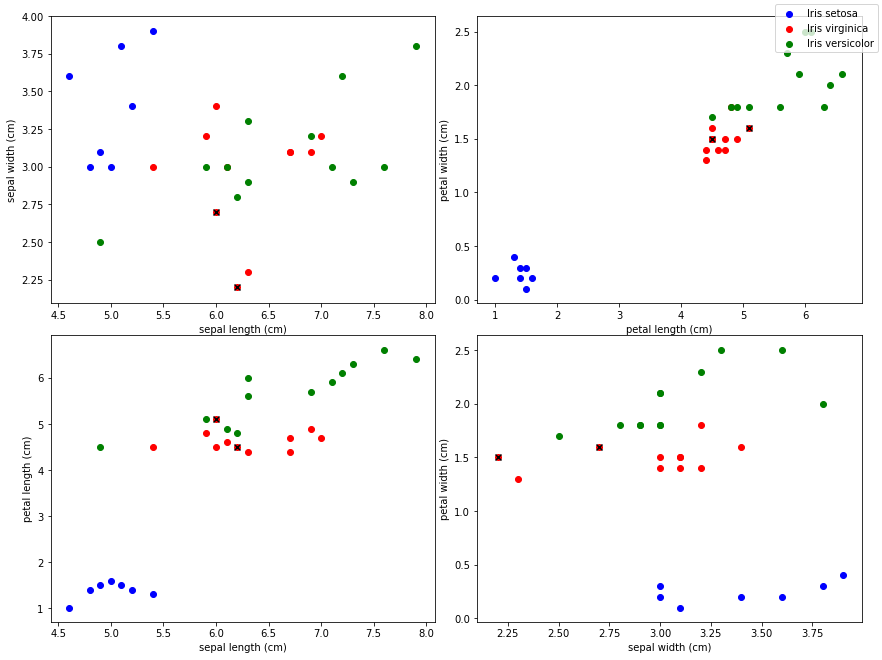

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
fig.tight_layout()

# features to plot against each other
plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

d = df_test

for i, ax in enumerate(axes.flat):
    x_col = d.columns[plots[i][0]]
    y_col = d.columns[plots[i][1]]
    
    for j in range(3):
        # get data for each target
        target_df = d[d['target']==j]
        x_coords = target_df[x_col]
        y_coords = target_df[y_col]

        ax.scatter(x_coords, y_coords, color=colors[j])
    
    # graph incorrect gueses with black x
    ax.scatter(d[d['correct']==False][x_col], d[d['correct']==False][y_col], color='black', marker='x')
    ax.set(xlabel=x_col, ylabel=y_col)

fig.legend(labels=labels, loc=1)
plt.show()